In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
from os.path import expanduser
home = expanduser("~")

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

# from plotFuncs_corr import *
import skimage.measure as skm
from scipy import stats

In [5]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]


experiments = [
    'historical',
    # 'rcp85'
    ]
experiment = experiments[0]

observations = ['GPCP']

org_options = [
    'rome',
    # 'rome_n',
    # 'o_number'
    ]
org_option = org_options[0]

prE_option = 'pr99'



In [3]:
def plot_scatter(ax, x,y):
    plt.scatter(x,y,facecolors='none', edgecolor='k')
    res= stats.pearsonr(x,y)
    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.8, 0.875), textcoords='axes fraction') # xy=(0.2, 0.1), xytext=(0.05, 0.875)


In [2]:
def plot_bins(x,y, ax):    
    bin_width = (x.max() - x.min())/100
    bin_end = x.max()
    bins = np.arange(0, bin_end+bin_width, bin_width)

    y_bins = []
    for i in np.arange(0,len(bins)-1):
        y_bins = np.append(y_bins, y.where((x>=bins[i]) & (x<=bins[i+1])).mean())
    ax.plot(bins[:-1], y_bins)

In [132]:
# fig= plt.figure(figsize=(22.5,17.5))
# fig.suptitle(prE_option + ' and ' + org_option  + ' annual, (' + experiment + '+ obs)', fontsize=18, y=0.95)

# for i, model in enumerate(models):
#     org = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' +  model + '_rome_' + experiment + '.nc')[org_option]
#     prE = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_prPercentiles_' + experiment + '.nc')[prE_option]

#     ax= fig.add_subplot(5,4,i+1)
#     x = org
#     y = prE
#     plot_scatter(ax, x,y)
#     ax.set_title(model)

#     if model == 'FGOALS-g2':
#         ax.set_xlim(0, 1e6)

#     if i== 0 or i==4 or i==8 or i==12 or i==16:
#         ax.set_ylabel(prE_option + ' [mm day' + chr(0x207B) + chr(0x00B9)+ ']')

#     if i>=16:
#         ax.set_xlabel(org_option + ' [km\u00b2]')


# for i, obs in enumerate(observations):
#     org = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_rome.nc')[org_option]
#     prE = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_pr_percentiles.nc')[prE_option]

#     ax= fig.add_subplot(5,4,20)
#     x = org
#     y = prE
#     plot_scatter(ax, x,y)
#     ax.set_title(obs)

#     ax.set_ylabel(prE_option + ' [mm day' + chr(0x207B) + chr(0x00B9)+ ']')
#     ax.set_xlabel(org_option + ' [km\u00b2]')

#     ax.set_xlim(0, 1e6)

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

### figure 1

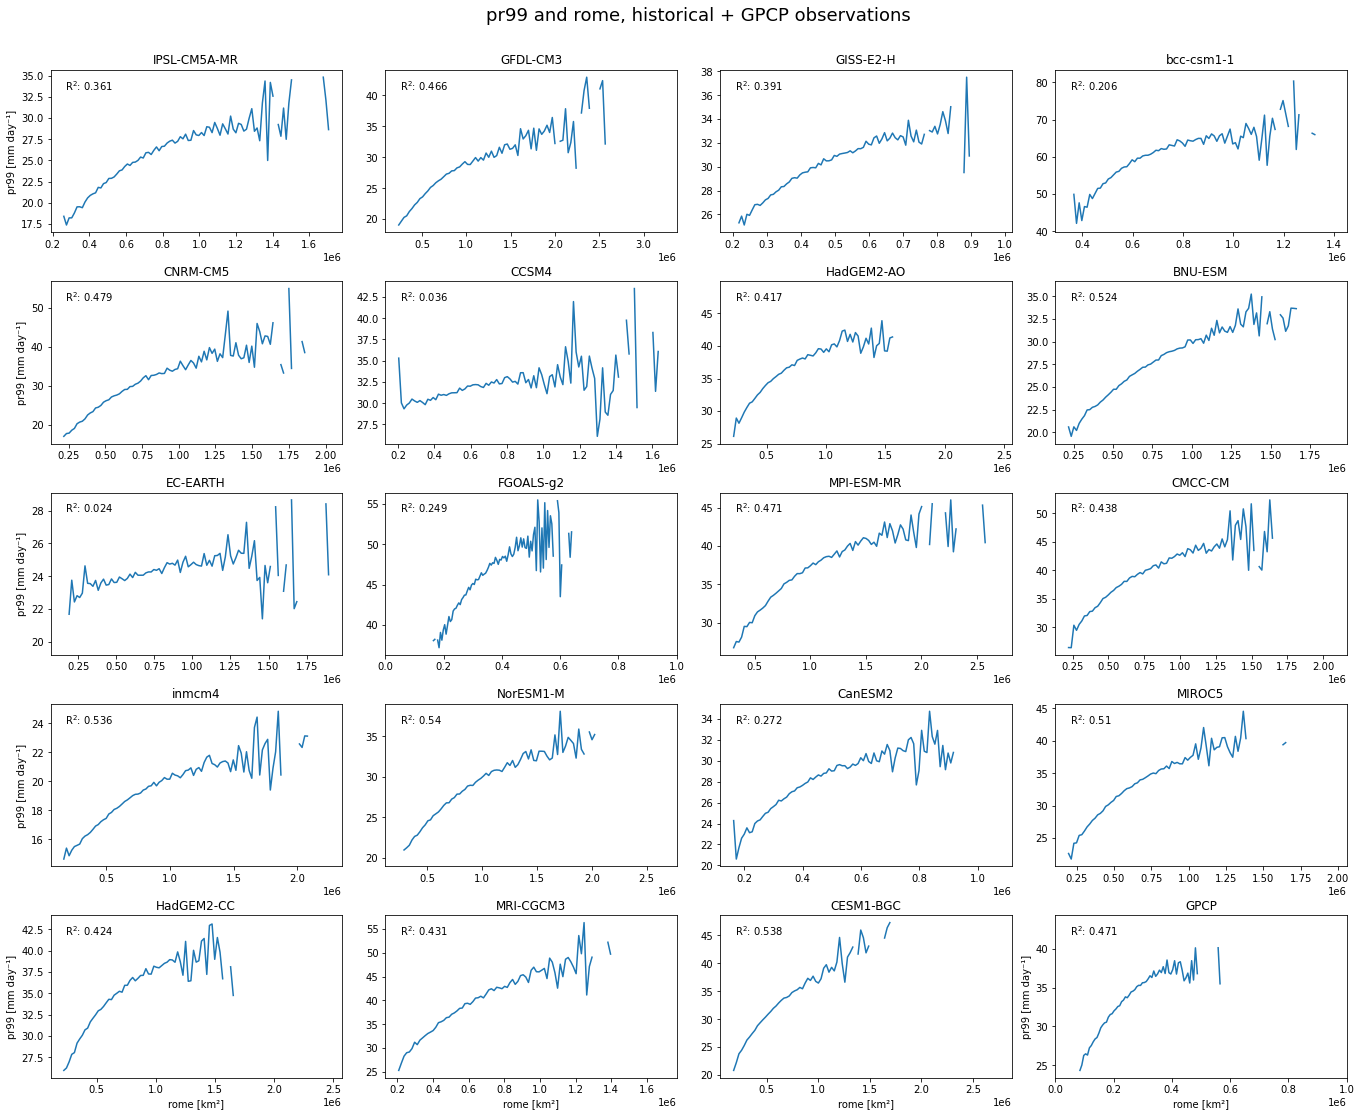

In [133]:
fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle(prE_option + ' and ' + org_option  + ', ' + experiment + ' + GPCP observations', fontsize=18, y=0.95)

for i, model in enumerate(models):
    org = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' +  model + '_rome_' + experiment + '.nc')[org_option]
    prE = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_prPercentiles_' + experiment + '.nc')[prE_option]

    ax= fig.add_subplot(5,4,i+1)

    x = org
    y = prE
    res= stats.pearsonr(x,y)
    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')

    plot_bins(x,y, ax)
    ax.set_title(model)

    if model == 'FGOALS-g2':
        ax.set_xlim(0, 1e6)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ax.set_ylabel(prE_option + ' [mm day' + chr(0x207B) + chr(0x00B9)+ ']')

    if i>=16:
        ax.set_xlabel(org_option + ' [km\u00b2]')


for i, obs in enumerate(observations):
    org = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_rome.nc')[org_option]
    prE = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_pr_percentiles.nc')[prE_option]

    ax= fig.add_subplot(5,4,20)

    x = org
    y = prE
    res= stats.pearsonr(x,y)
    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')

    plot_bins(x,y, ax)
    ax.set_title(obs)

    ax.set_ylabel(prE_option + ' [mm day' + chr(0x207B) + chr(0x00B9)+ ']')
    ax.set_xlabel(org_option + ' [km\u00b2]')

    ax.set_xlim(0, 1e6)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)




In [134]:
model ='CNRM-CM5'
folder = home + '/Documents/data/cmip5/ds2/' + model
fileName = model + '_precip_' + experiment + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
precip = ds.precip*60*60*24
precip.attrs['units']= 'mm day' + chr(0x207B) + chr(0x00B9)

In [135]:
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_prPercentiles_' + experiment + '.nc'
path = folder + '/' + fileName
pr_percentiles = xr.open_dataset(path)

In [136]:
conv_threshold = pr_percentiles.pr97.mean(dim=('time'))

In [137]:
folder = home + '/Documents/data/cmip5/' + model
fileName = model + '_rome_' + experiment + '.nc'
path = folder + '/' + fileName
rome = xr.open_dataset(path)

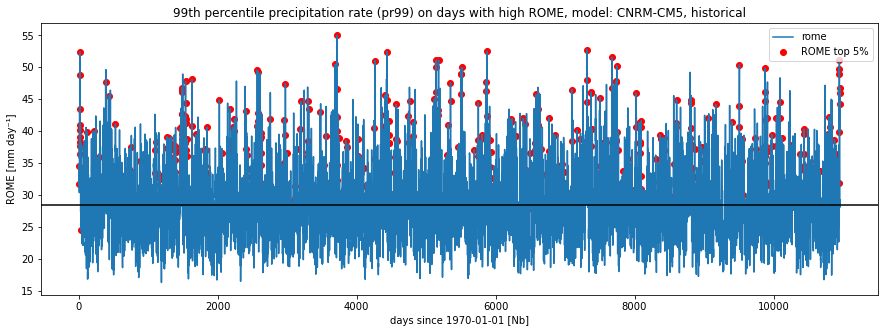

In [138]:
f, ax = plt.subplots(figsize = (15,5))

y = pr_percentiles[prE_option].data
x= np.arange(0,len(y),1)
rome_prctile = np.percentile(rome[org_option],95)
x2= np.argwhere(rome[org_option].data>=rome_prctile)

ax.plot(x,y, label=org_option)
ax.scatter(x2,y[x2],label='ROME top 5%', color='r')
ax.axhline(y=np.mean(y), color='k')
ax.set_title('99th percentile precipitation rate (pr99) on days with high ROME, model: ' + model + ', ' + experiment)
ax.set_xlabel('days since 1970-01-01 [Nb]')
ax.set_ylabel('ROME [mm day' + chr(0x207B) + chr(0x00B9)+ ']')
ax.legend()


<Figure size 1080x540 with 0 Axes>

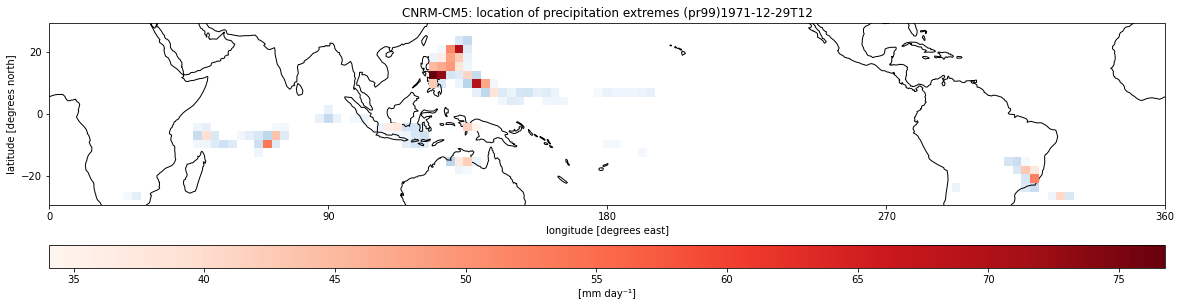

In [139]:
fig= plt.figure(figsize=(15,7.5))

lat = precip.lat
lon = precip.lon
lonm,latm = np.meshgrid(lon,lat)

rome_prctile = np.percentile(rome[org_option],99)
x2= np.argwhere(rome[org_option].data>=rome_prctile)

for x in x2[4]:
    fig= plt.figure(figsize=(20,7.5))
    ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pr_day = precip.isel(time=x)
    extreme_percentileDay = pr_percentiles[prE_option].isel(time=x).data

    ax.pcolormesh(lonm,latm, pr_day.where(pr_day>conv_threshold),transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues', vmin=15, vmax=80)
    pcm= ax.pcolormesh(lonm,latm, pr_day.where(pr_day>extreme_percentileDay),transform=cartopy.crs.PlateCarree(), cmap='Reds')

    ax.set_title(model + ': location of precipitation extremes (pr99)' + str(pr_day.coords['time'].values)[:11] )
    ax.set_xlabel('longitude [degrees east]')
    ax.set_ylabel('latitude [degrees north]')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])

    plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = '[mm day' + chr(0x207B) + chr(0x00B9) +']')


### figure 2

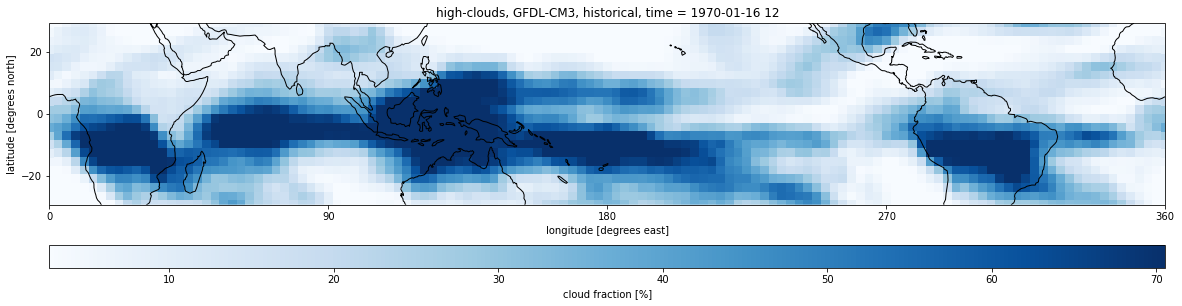

In [140]:
model = 'GFDL-CM3'
scene = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ 'clouds_tMean' +'_historical.nc')['cloud_low_snapshot']/100
scene1 = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ 'clouds_tMean' +'_historical.nc')['cloud_high_snapshot']/100    

ds = [scene, scene1]
vmin, vmax = [], []
for dataset in ds:
    vmin = np.append(vmin, dataset.quantile(0.10,dim=('lat','lon')))
    vmax = np.append(vmax, dataset.quantile(0.90,dim=('lat','lon')))
vmin = np.min(vmin)
vmax = np.max(vmax)

lat = precip.lat
lon = precip.lon
lonm,latm = np.meshgrid(lon,lat)

fig= plt.figure(figsize=(20,7.5))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene1,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues', vmin=vmin, vmax=vmax)

title = 'high-clouds, ' + model + ', historical, ' + 'time = ' + str(scene1.coords['time'].values)[:11] 
ax.set_title(title)
ax.set_xlabel('longitude [degrees east]')
ax.set_ylabel('latitude [degrees north]')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'cloud fraction [%]')

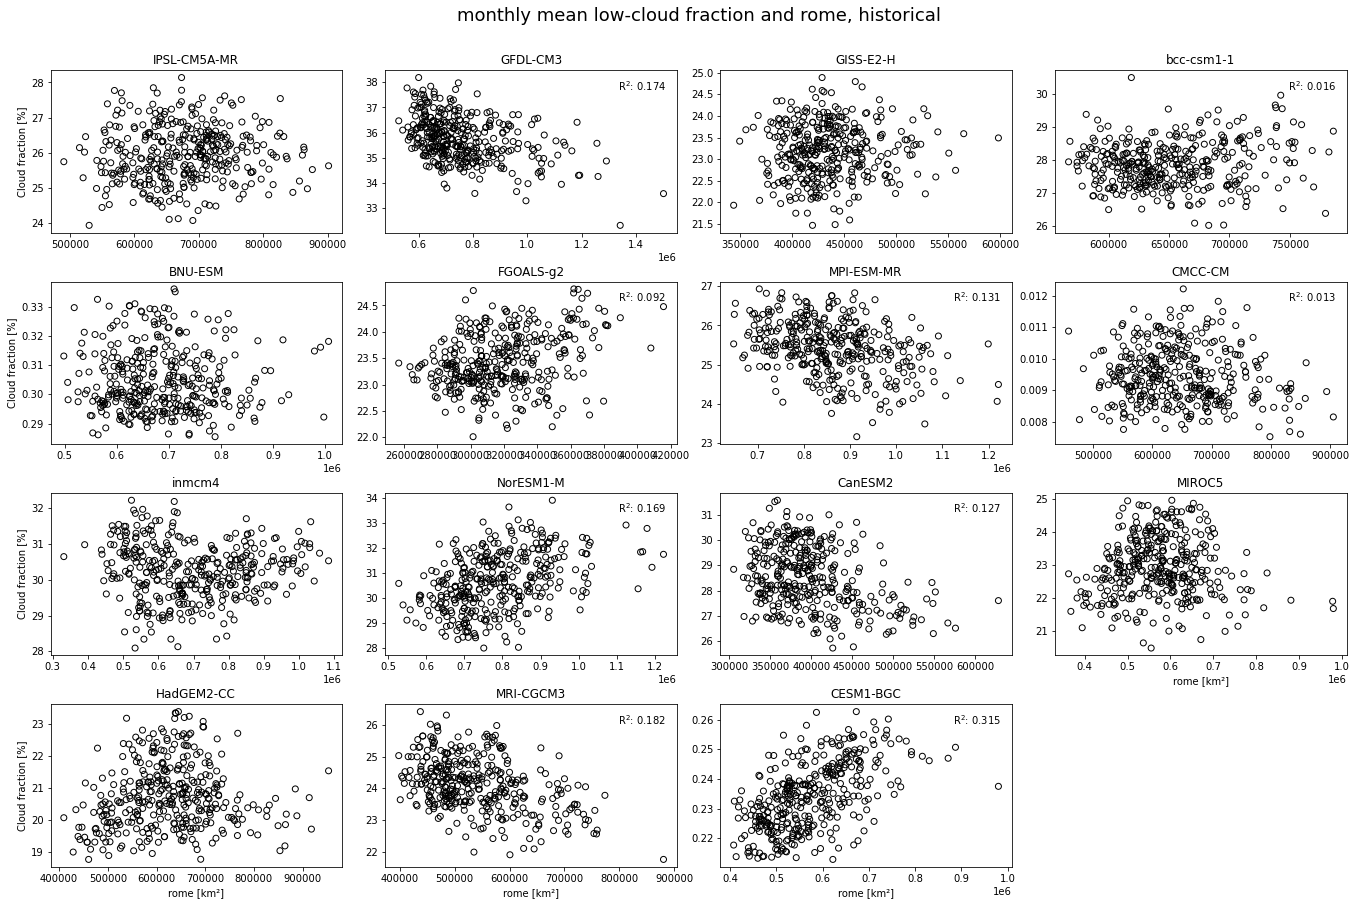

In [142]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle('monthly mean low-cloud fraction and ' + org_option  + ', ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    org = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' +  model + '_rome_' + experiment + '.nc')[org_option].resample(time='M').mean(dim='time', keep_attrs=True)
    cloud_low = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ 'clouds' +'_sMean_' + experiment + '.nc')['cloud_low_sMean']/100

    ax= fig.add_subplot(5,4,i+1)
    x = org
    y = cloud_low
    plot_scatter(ax, x,y)
    ax.set_title(model)

    # if model == 'FGOALS-g2':
    #     ax.set_xlim(0, 1e6)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ax.set_ylabel('Cloud fraction' + ' [%]')

    if i>=len(models)-4:
        ax.set_xlabel(org_option + ' [km\u00b2]')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

### figure 3

In [16]:
model = 'GFDL-CM3'
scene = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_wap500_tMean_historical.nc')['wap500_snapshot']/100

vmin = np.min(scene)
vmax = -np.min(scene)

lat = precip.lat
lon = precip.lon
lonm,latm = np.meshgrid(lon,lat)

fig= plt.figure(figsize=(20,7.5))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap="RdBu_r", vmin=vmin, vmax=vmax)

title = 'Pressure velocity at 500 hpa, ' + model + ', historical, ' + 'time = ' + str(scene.coords['time'].values)[:11] 
ax.set_title(title)
ax.set_xlabel('longitude [degrees east]')
ax.set_ylabel('latitude [degrees north]')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'pressure velocity [hPa day' + chr(0x207B) + chr(0x00B9)+ ']')


NameError: name 'precip' is not defined

In [146]:
# def plot_scene(scene, cmap='Reds', title='', vmin=None, vmax=None,fig_width=17.5 ,fig_height=8):
#     projection = cartopy.crs.PlateCarree(central_longitude=180)
#     lat = scene.lat
#     lon = scene.lon

#     f, ax = plt.subplots(subplot_kw=dict(projection=projection), figsize=(fig_width, fig_height))
#     scene.plot(transform=cartopy.crs.PlateCarree(), cbar_kwargs={'orientation': 'horizontal','pad':0.125, 'aspect':50,'fraction':0.055, 'label':'pressure velocity [hPa day' + chr(0x207B) + chr(0x00B9)+ ']'}, cmap=cmap, vmin=vmin, vmax=vmax)
#     ax.add_feature(cartopy.feature.COASTLINE)
#     ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())
#     ax.set_title(title)
#     ax.set_xticks([-180, -90, 0, 90, 180])
#     ax.set_xticklabels([0, 90, 180, 270, 360])
#     ax.set_yticks([-20, 0, 20])
#     plt.tight_layout()

# model = 'GFDL-CM3'
# scene = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_wap500_tMean_historical.nc')['wap500_snapshot']/100
# cmap="RdBu_r"
# title = 'Pressure velocity at 500 hpa, ' + model + ', historical, ' + 'time = ' + str(scene.coords['time'].values)[:13] 
# vmin = np.min(scene)
# vmax = -np.min(scene)
# plot_scene(scene, cmap, title, vmin, vmax,fig_width=17.5 ,fig_height=8)

In [73]:
# models = [
#     'IPSL-CM5A-MR', # 1
#     'GFDL-CM3',     # 2
#     # 'GISS-E2-H',    # 3
#     'bcc-csm1-1',   # 4
#     'CNRM-CM5',     # 5
#     # 'CCSM4',        # 6
#     # 'HadGEM2-AO',   # 7
#     'BNU-ESM',      # 8
#     # 'EC-EARTH',     # 9
#     'FGOALS-g2',    # 10
#     'MPI-ESM-MR',   # 11
#     'CMCC-CM',      # 12
#     # 'inmcm4',       # 13
#     'NorESM1-M',    # 14
#     'CanESM2',      # 15
#     'MIROC5',       # 16
#     # 'HadGEM2-CC',   # 17
#     'MRI-CGCM3',    # 18
#     # 'CESM1-BGC'     # 19
#     ]

# fig= plt.figure(figsize=(22.5,17.5))
# fig.suptitle(prE_option + ' and ' + org_option  + ' annual, (' + experiment + '+ obs)', fontsize=18, y=0.95)

# for i, model in enumerate(models):
#     org = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' +  model + '_rome_' + experiment + '.nc')[org_option]
#     wap500_ascent = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_wap500_ascent_historical.nc')['wap500_ascent']

#     ax= fig.add_subplot(5,4,i+1)
#     x = org
#     y = wap500_ascent
#     plot_scatter(ax, x,y)
#     ax.set_title(model)


#     if i== 0 or i==4 or i==8 or i==12 or i==16:
#         ax.set_ylabel('pressure velocity' + ' [hPa day' + chr(0x207B) + chr(0x00B9)+ ']')

#     if i>=(len(models)-4):
#         ax.set_xlabel(org_option + ' [km\u00b2]')


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

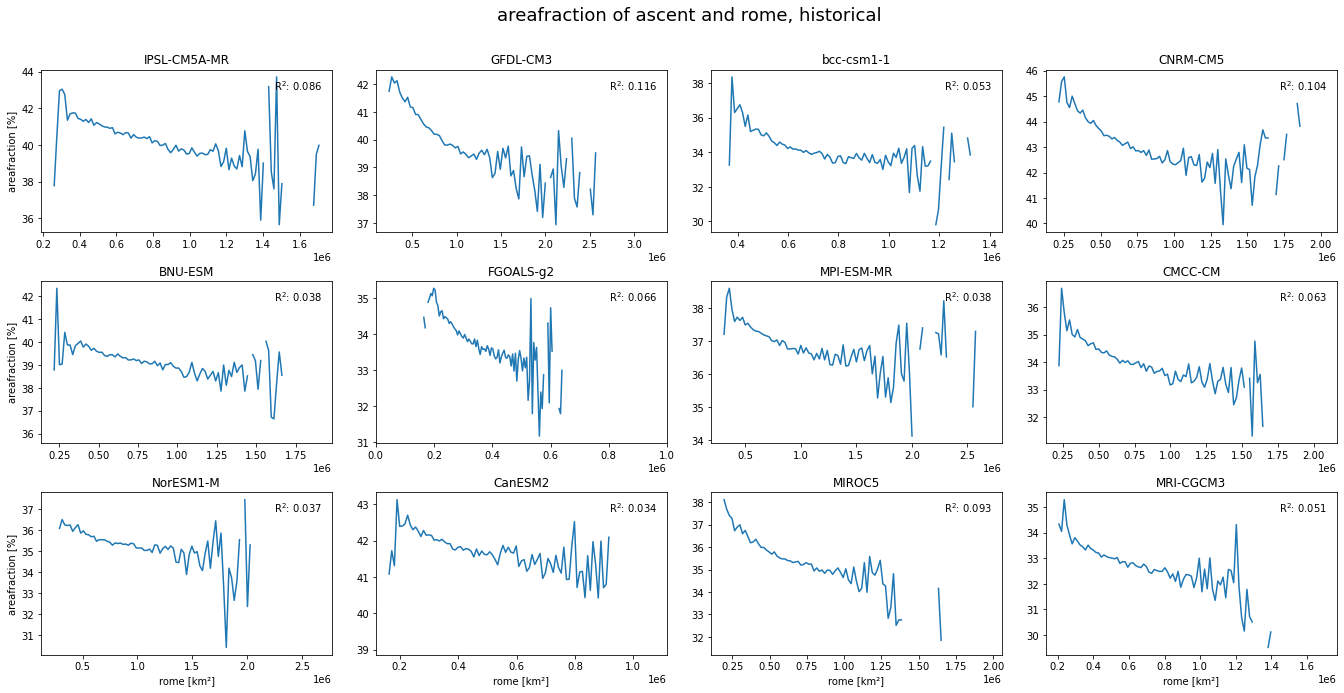

In [148]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle('areafraction of ascent and ' + org_option  + ', ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    org = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' +  model + '_rome_' + experiment + '.nc')[org_option]
    wap500_ascent = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_wap500_ascent_historical.nc')['wap500_ascent']

    ax= fig.add_subplot(5,4,i+1)

    x = org
    y = wap500_ascent 
    res= stats.pearsonr(x,y)
    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.8, 0.875), textcoords='axes fraction')

    plot_bins(x,y, ax)
    ax.set_title(model)

    if model == 'FGOALS-g2':
        ax.set_xlim(0, 1e6)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ax.set_ylabel('areafraction' + ' [%]')

    if i>=(len(models)-4):
        ax.set_xlabel(org_option + ' [km\u00b2]')



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
plt.savefig('test.pdf')  

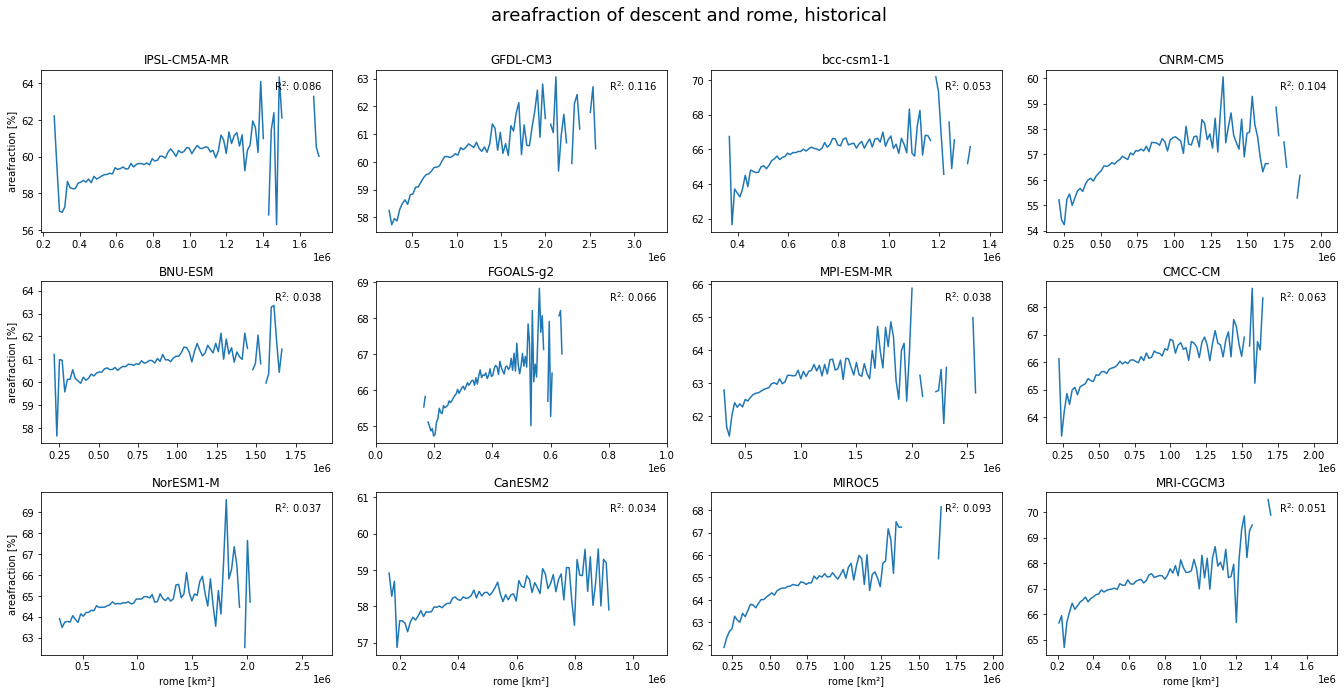

In [150]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle('areafraction of descent and ' + org_option  + ', ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    org = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' +  model + '_rome_' + experiment + '.nc')[org_option]
    wap500_descent = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_wap500_descent_historical.nc')['wap500_descent']

    ax= fig.add_subplot(5,4,i+1)

    x = org
    y = wap500_descent 
    res= stats.pearsonr(x,y)
    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.8, 0.875), textcoords='axes fraction')

    plot_bins(x,y, ax)
    ax.set_title(model)

    if model == 'FGOALS-g2':
        ax.set_xlim(0, 1e6)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ax.set_ylabel('areafraction' + ' [%]')

    if i>=(len(models)-4):
        ax.set_xlabel(org_option + ' [km\u00b2]')



plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
# plt.savefig('test.pdf')  

### figure 4

In [155]:
model = 'GFDL-CM3'
var = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_'+ 'Fpr10' +'_historical.nc')
var.F_pr10

<xarray.DataArray 'F_pr10' (time: 10950)>
array([298, 273, 268, ..., 322, 325, 297])
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Attributes:
    units:    Nb

In [9]:
def plot_sceneThreshold(scene_background, scene, cmap_background, cmap, title, fig_width=17.5 ,fig_height=8):
    fig= plt.figure(figsize=(fig_width, fig_height))
    lat = scene_background.lat
    lon = scene_background.lon
    lonm,latm = np.meshgrid(lon,lat)
    ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

    pcm= ax.pcolormesh(lonm,latm, scene_background, transform=cartopy.crs.PlateCarree(),zorder=0, cmap=cmap_background)
    ax.pcolormesh(lonm,latm, scene, transform=cartopy.crs.PlateCarree(), cmap=cmap)

    ax.set_title(title)
    ax.set_xlabel('longitude')
    ax.set_ylabel('latitude')

    ax.set_yticks([-20, 0, 20])
    ax.set_xticks([-180, -90, 0, 90, 180])
    ax.set_xticklabels([0, 90, 180, 270, 360])

    plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = scene_background.units)

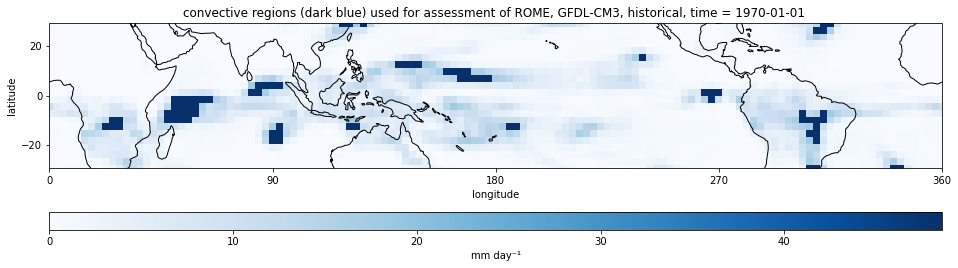

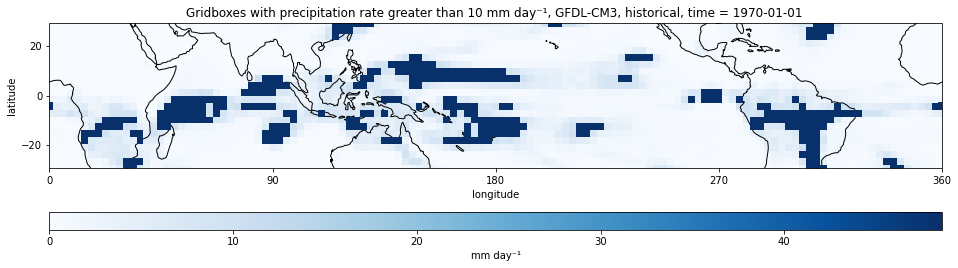

In [15]:
model = 'GFDL-CM3'
experiment = 'historical'

scene_background = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_precip_tMean_historical.nc')['precip_snapshot']
threshold = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_prPercentiles_' + experiment + '.nc').pr97.mean(dim='time').values
L = skm.label(scene_background.where(scene_background>=threshold,0)>0, background=np.nan,connectivity=2)
L = (L>0)*1
labelMatrix = xr.DataArray(
    data=L,
    dims=['lat', 'lon'],
    coords={'lat': scene_background.lat.data, 'lon': scene_background.lon.data}
    )
scene1 = labelMatrix.where(labelMatrix>0)

cmap_background= 'Blues'
cmap = 'Blues_r'
title = 'convective regions (dark blue) used for assessment of ROME, ' + model + ', ' + experiment + ', time = ' + str(scene_background.coords['time'].values)[:11] 
plot_sceneThreshold(scene_background, scene1, cmap_background, cmap, title,fig_width=16 ,fig_height=8)


scene_background = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_precip_tMean_historical.nc')['precip_snapshot']
threshold = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_prPercentiles_' + experiment + '.nc').pr97.mean(dim='time').values
L = skm.label(scene_background.where(scene_background>=10,0)>0, background=np.nan,connectivity=2)
L = (L>0)*1
labelMatrix = xr.DataArray(
    data=L,
    dims=['lat', 'lon'],
    coords={'lat': scene_background.lat.data, 'lon': scene_background.lon.data}
    )
scene2 = labelMatrix.where(labelMatrix>0)

cmap="Blues_r"
title = 'Gridboxes with precipitation rate greater than 10 mm day' + chr(0x207B) + chr(0x00B9) + ', ' + model + ', historical, ' + 'time = ' + str(scene_background.coords['time'].values)[:11] 
plot_sceneThreshold(scene_background, scene2, cmap_background, cmap, title,fig_width=16 ,fig_height=8)


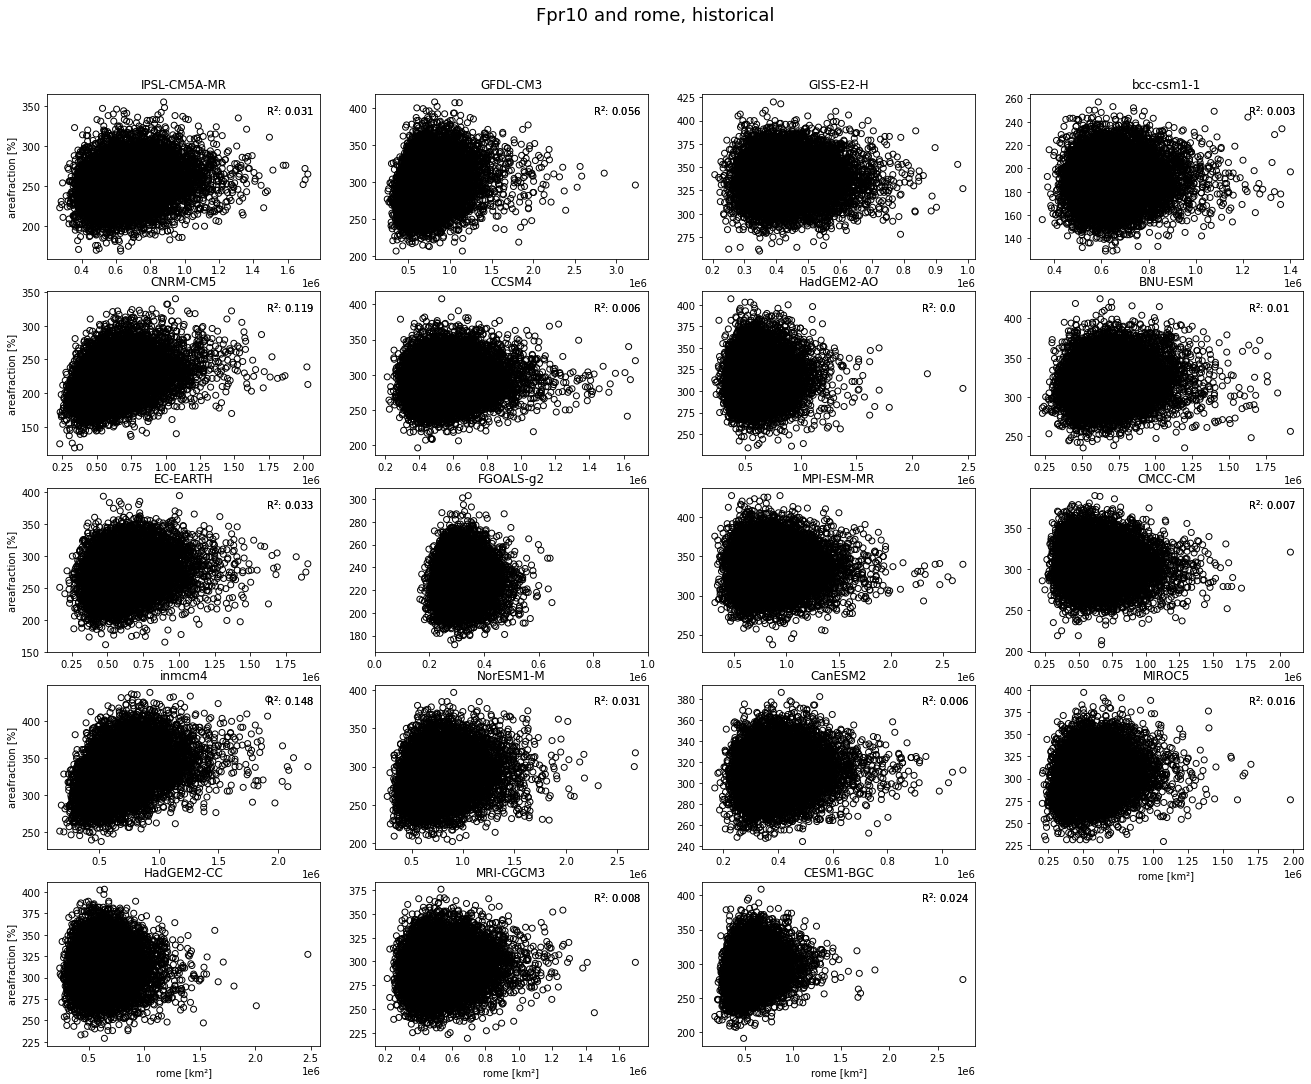

In [17]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle('Fpr10 and ' + org_option  + ', ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    org = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' +  model + '_rome_' + experiment + '.nc')[org_option]
    F_pr10 = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_Fpr10_historical.nc')['F_pr10']

    ax= fig.add_subplot(5,4,i+1)

    x = org
    y = F_pr10
    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.8, 0.875), textcoords='axes fraction')

    plot_scatter(ax, x,y)
    ax.set_title(model)

    if model == 'FGOALS-g2':
        ax.set_xlim(0, 1e6)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ax.set_ylabel('areafraction' + ' [%]')

    if i>=(len(models)-4):
        ax.set_xlabel(org_option + ' [km\u00b2]')


# for i, obs in enumerate(observations):
#     org = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_rome.nc')[org_option]
#     F_pr10 = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_Fpr10.nc')[prE_option]

#     ax= fig.add_subplot(5,4,20)
#     x = org
#     y = prE
#     plot_scatter(ax, x,y)
#     ax.set_title(obs)

#     ax.set_ylabel(prE_option + ' [mm day' + chr(0x207B) + chr(0x00B9)+ ']')
#     ax.set_xlabel(org_option + ' [km\u00b2]')

#     ax.set_xlim(0, 1e6)

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

plt.savefig('test.pdf')  

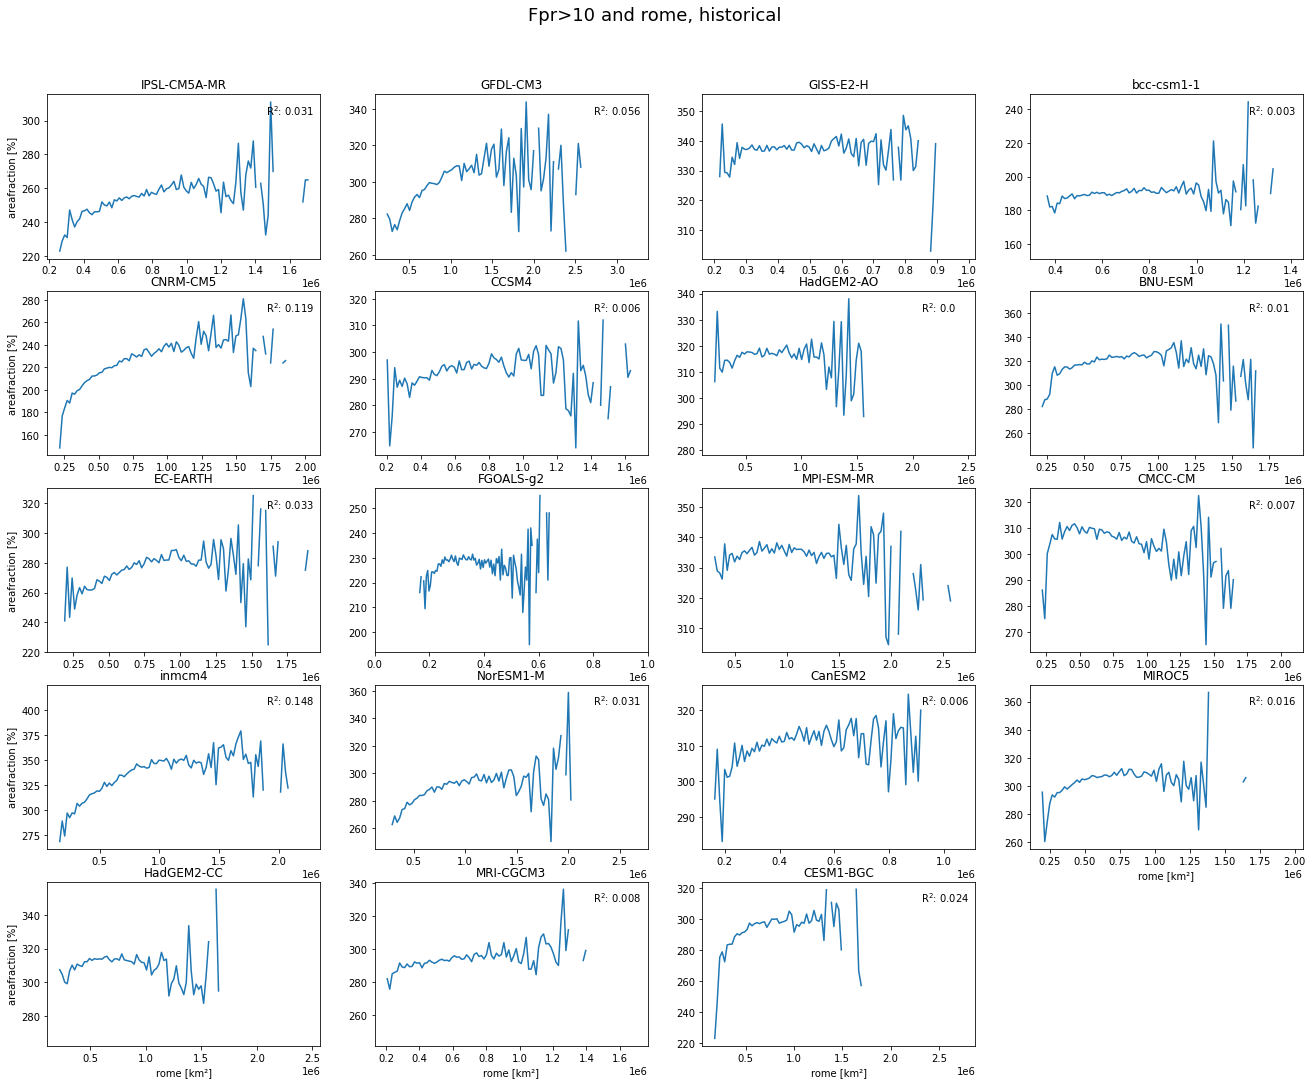

In [18]:
models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'EC-EARTH',     # 9
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

fig= plt.figure(figsize=(22.5,17.5))
fig.suptitle('Fpr>10 and ' + org_option  + ', ' + experiment, fontsize=18, y=0.95)

for i, model in enumerate(models):
    org = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' +  model + '_rome_' + experiment + '.nc')[org_option]
    F_pr10 = xr.open_dataset(home + '/Documents/data/cmip5/' + model + '/' + model + '_Fpr10_historical.nc')['F_pr10']

    ax= fig.add_subplot(5,4,i+1)

    x = org
    y = F_pr10
    res= stats.pearsonr(x,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.8, 0.875), textcoords='axes fraction')

    plot_bins(x,y, ax)
    ax.set_title(model)

    if model == 'FGOALS-g2':
        ax.set_xlim(0, 1e6)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ax.set_ylabel('areafraction' + ' [%]')

    if i>=(len(models)-4):
        ax.set_xlabel(org_option + ' [km\u00b2]')


# for i, obs in enumerate(observations):
#     org = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_rome.nc')[org_option]
#     F_pr10 = xr.open_dataset(home + '/Documents/data/obs/' + obs + '/' + obs + '_Fpr10.nc')[prE_option]

#     ax= fig.add_subplot(5,4,20)
#     x = org
#     y = prE
#     plot_scatter(ax, x,y)
#     ax.set_title(obs)

#     ax.set_ylabel(prE_option + ' [mm day' + chr(0x207B) + chr(0x00B9)+ ']')
#     ax.set_xlabel(org_option + ' [km\u00b2]')

#     ax.set_xlim(0, 1e6)

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

plt.savefig('test.pdf')  